# FashionMNIST Object Classifier

In [ ]:
# Avoids scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torch import nn
from torch.optim import SGD
import random

Loading and training the dataset

In [ ]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 10207367.30it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 174059.90it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3223243.13it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6036420.74it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [ ]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

Defining the Model- \\
Input  - 784 \\
First Layer - 256 \\
Second Layer - 128 \\
Third Layer - 64 \\
Output - 10 \\
ReLu Activation

In [ ]:
model = nn.Sequential(
nn.Linear(784, 256),
nn.ReLU(),
nn.Linear(256,128),
nn.ReLU(),
nn.Linear(128, 64),
nn.ReLU(),
nn.Linear(64, 10),
nn.LogSoftmax(dim=1)
)

model = model.cuda()
Loss =  nn.NLLLoss()
optimizer = SGD(model.parameters(),lr=0.01)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'We\'re using the {device}.')
# Put the model on the device
model = model.to(device)

We're using the cuda.


Tain Test process

In [ ]:
train_losses = []
test_losses = []
epochs = 25
for epoch in range(epochs):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.view(images.shape[0],-1)
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    predicted_output = model(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.view(images.shape[0],-1)
      images, labels = images.to(device), labels.to(device)
      predicted_output = model(images)
      images = images.view(images.shape[0],-1)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_losses.append(train_loss)
  test_losses.append(test_loss)
  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')

Epoch 0, Train loss 1.8399109340934103, Test loss 1.1133655210968796
Epoch 1, Train loss 0.8908402905154076, Test loss 0.8020115107487721
Epoch 2, Train loss 0.7057181565301505, Test loss 0.6733675908510852
Epoch 3, Train loss 0.6118953264852577, Test loss 0.5891663990202983
Epoch 4, Train loss 0.5563539339344639, Test loss 0.5571915233970448
Epoch 5, Train loss 0.5195225354101358, Test loss 0.5377473778975238
Epoch 6, Train loss 0.4889323956676638, Test loss 0.5306172742965115
Epoch 7, Train loss 0.4677761937223518, Test loss 0.5173769483141079
Epoch 8, Train loss 0.4516391106950703, Test loss 0.5119089647463173
Epoch 9, Train loss 0.43629330607937344, Test loss 0.45765032396195043
Epoch 10, Train loss 0.4250166451753075, Test loss 0.4466549165689262
Epoch 11, Train loss 0.4139864701452032, Test loss 0.44663736945504595
Epoch 12, Train loss 0.40394342908345815, Test loss 0.4532040616699085
Epoch 13, Train loss 0.3944739971174868, Test loss 0.4296836366129529
Epoch 14, Train loss 0.385

Train Test Plot

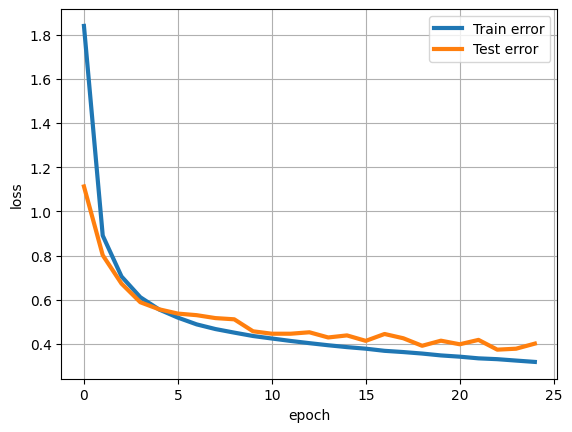

In [ ]:
plt.plot(range(epochs),train_losses,'-',linewidth=3,label='Train error')
plt.plot(range(epochs),test_losses,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

The train and test loss curves decrease with every epoch. The test curve has a spike around epoch 5. This could be because of overfitting. 4 epochs and 8 epochs show the least distance between the gaps in the two curves. This indicates a good balance in the model's ability to generalize to unseen data. Training with less epochs epochs causes the model to give out many wrong labels, hence i used 25 epochs

Last pass of the training process

In [ ]:
predicted_classes = torch.max(predicted_output, 1)[1]
print('Predicted:', predicted_classes)
print('Labels:', labels)

Predicted: tensor([3, 0, 7, 5, 8, 2, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')
Labels: tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')


Picking 3 random images

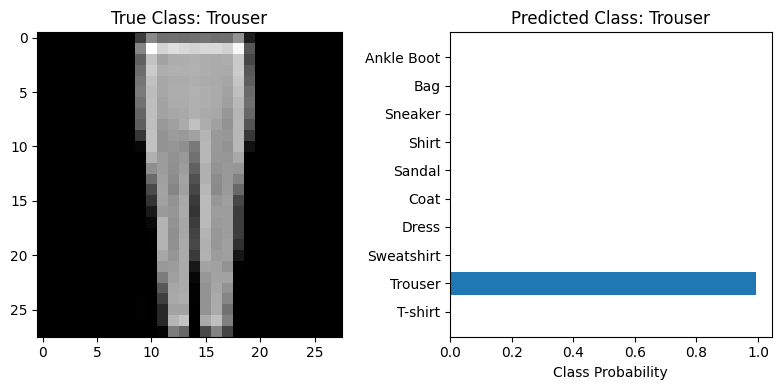

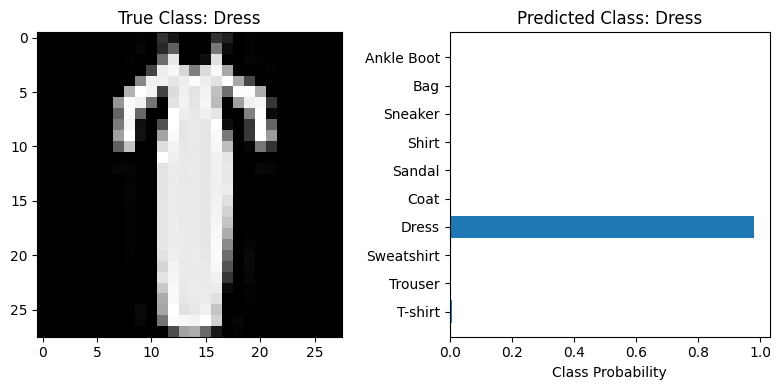

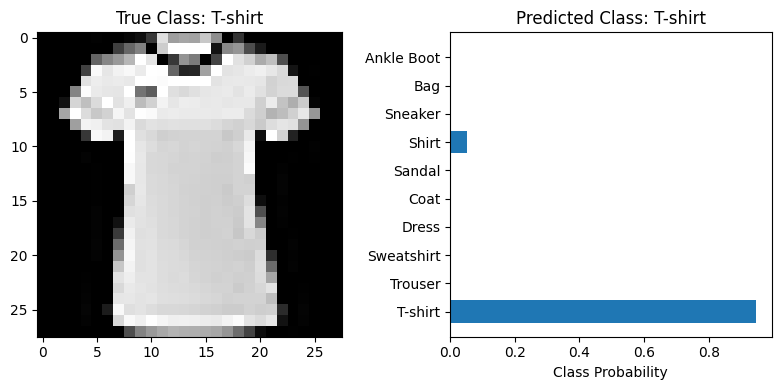

In [ ]:
class_labels = ['T-shirt', 'Trouser', 'Sweatshirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

sampled_indices = random.sample(range(len(testDataLoader.dataset)), 3)

for i, index in enumerate(sampled_indices):
    img, true_label = testDataLoader.dataset[index]

    img = img.view(1, 784)

    model = model.cpu()

    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)

    img = img.view(28, 28).numpy()

    ps = ps.numpy()
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'True Class: {class_labels[true_label]}')

    plt.subplot(1, 2, 2)
    plt.barh(np.arange(10), ps.ravel())
    plt.yticks(np.arange(10), class_labels)
    plt.xlabel('Class Probability')
    plt.title(f'Predicted Class: {class_labels[np.argmax(ps)]}')

    plt.tight_layout()

    plt.show()

For each of the three randomly selected validation images, the predicted class probabilities are displayed. These probabilities show the model's confidence in its predictions. In most cases, the highest predicted probability corresponds to the true class label. Hence, accurate predictions.